# A Tour of Diffusion Models for Image Generation

In this notebook we'll take a look at an exciting class of neural networks called "diffusion models". Diffusion models.

## Setup

If you're running this notebook on Google Colab or locally, you'll need a few dependencies installed. You can install them with `pip` as follows:

In [ ]:
#! pip install datasets diffusers["training"] transformers ftfy

To be able to share your model with the community there are a few more steps to follow.

First you have to store your authentication token from the Hugging Face website (sign up [here](https://huggingface.co/join) if you haven't already!) then execute the following cell and input your username and password:

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Then you need to install Git-LFS. Uncomment and execute the following cell:

In [ ]:
# !apt install git-lfs

## Generating images from text

In [1]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16
).to("cuda")

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [2]:
prompt = "a photograph of an astronaut riding a horse"

In [9]:
outputs = pipe(prompt)
outputs

  0%|          | 0/51 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FA228D00220>], nsfw_content_detected=[False])

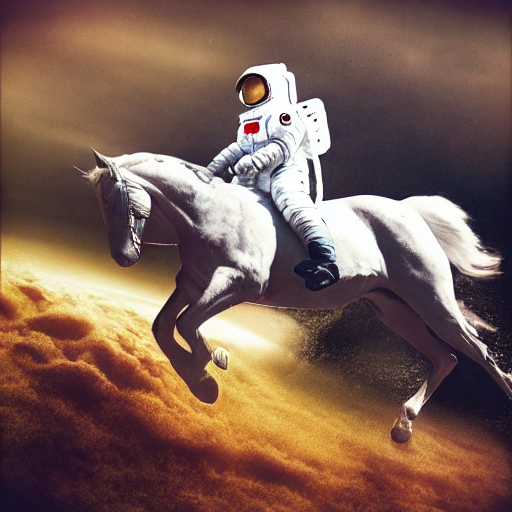

In [11]:
outputs.images[0]

  0%|          | 0/51 [00:00<?, ?it/s]

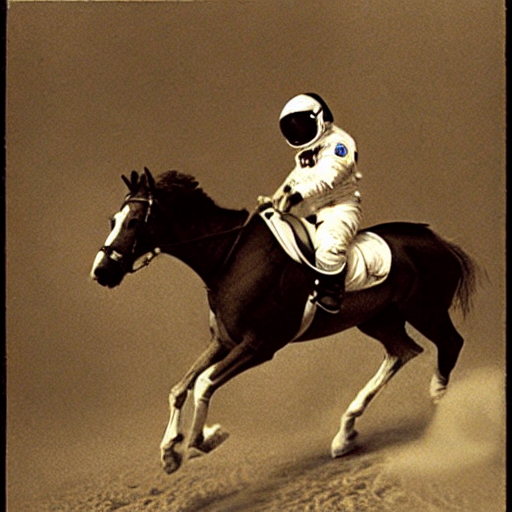

In [13]:
torch.manual_seed(1)
pipe(prompt).images[0]

## Negative prompts

  0%|          | 0/51 [00:00<?, ?it/s]

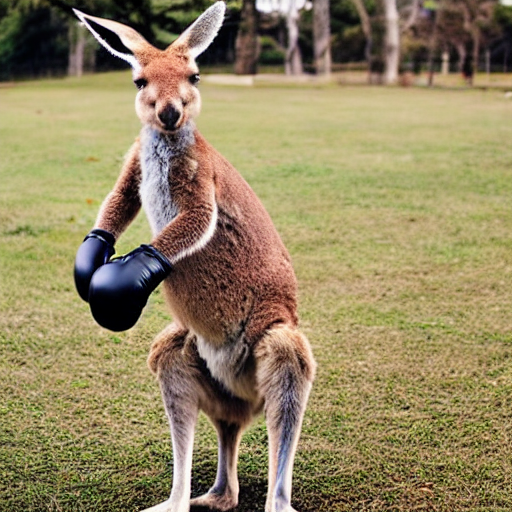

In [33]:
torch.manual_seed(8)
prompt = "Kangaroo wearing boxing gloves"
pipe(prompt).images[0]

  0%|          | 0/51 [00:00<?, ?it/s]

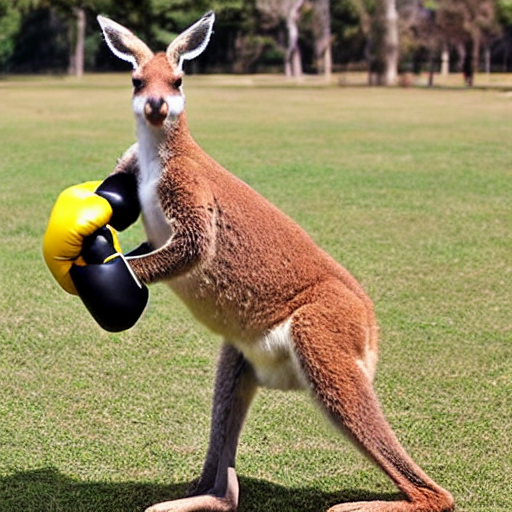

In [41]:
torch.manual_seed(8)
pipe(prompt, negative_prompt="blue").images[0]

## Generating images from images

## In-painting

## Fine-tuning with textual inversion

Link to Colab